<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/tsa_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [4]:
!R --version

R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [6]:
%%R
install.packages("stR") 

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘MatrixModels’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘iterators’, ‘SparseM’, ‘quantreg’, ‘forecast’, ‘foreach’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

In [7]:
%%R
library(stR)

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [8]:
%%R
library(forecast)
co2.fit <- tbats(co2)

R[write to console]: This is forecast 8.16 
  Stackoverflow is a great place to get help on R issues:
  http://stackoverflow.com/tags/forecasting+r.

R[write to console]: 
Attaching package: ‘forecast’


R[write to console]: The following object is masked from ‘package:stR’:

    seasadj




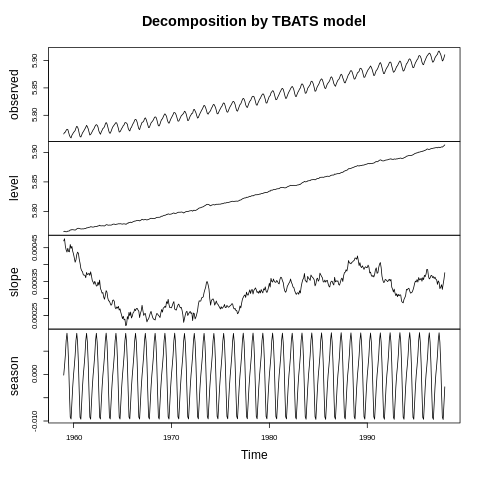

In [11]:
%%R
plot(co2.fit)

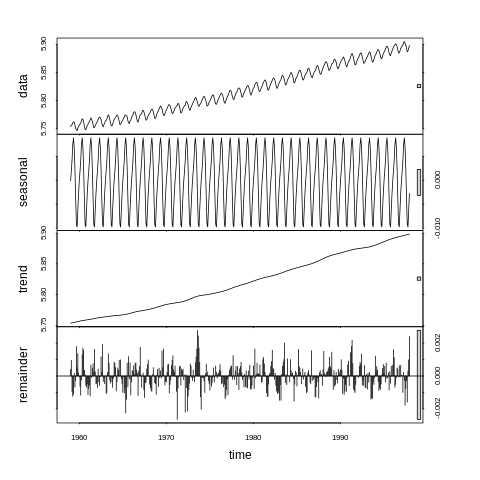

In [12]:
%%R
plot(stl(log(co2), s.window = "periodic", t.window = 30))

In [14]:
%%R
co2.fit <- AutoSTR(co2)

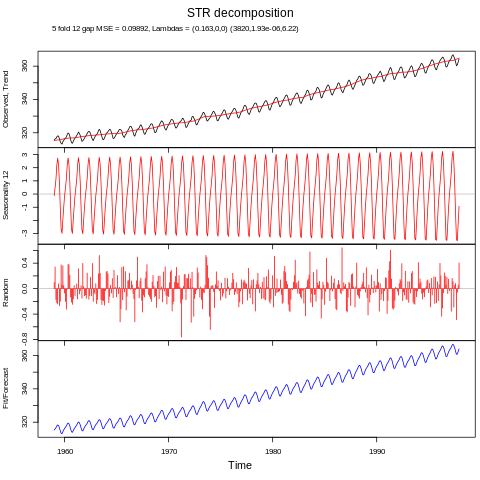

In [18]:
%%R
plot(co2.fit)

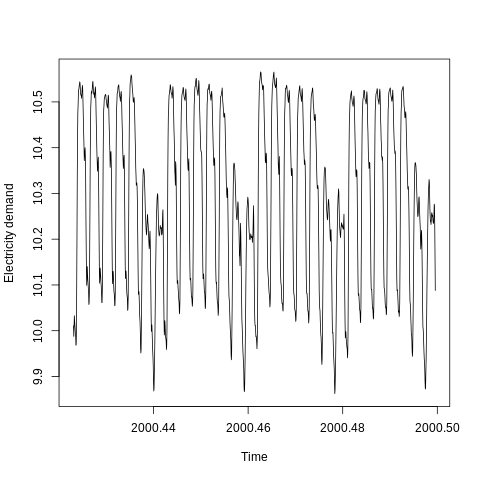

In [19]:
%%R
taylor.msts <- msts(
  log(head(as.vector(taylor), 336 * 4)),
  seasonal.periods = c(48, 48 * 7, 48 * 7 * 52.25), # Daily and weekly seasonality
  start = 2000 + 22 / 52
)
plot(taylor.msts, ylab = "Electricity demand")

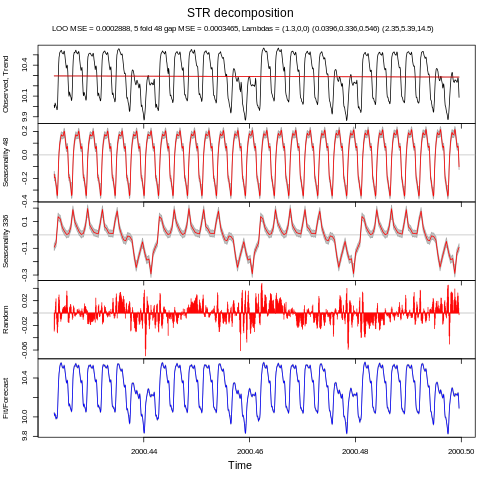

In [21]:
%%R
#
# confidence: 95% confidence intervals are calculated 
# (with assumptions: errors are uncorrelated, model parameters are estimated exactly)
# reltol: control how well (and for how long) the model parameters are optimized
# gapCV: number of observations used in gaps for CV
taylor.fit <- AutoSTR(
    taylor.msts, 
    gapCV = 48, 
    confidence = 0.95,
    reltol = 1e-6 
)
plot(taylor.fit)

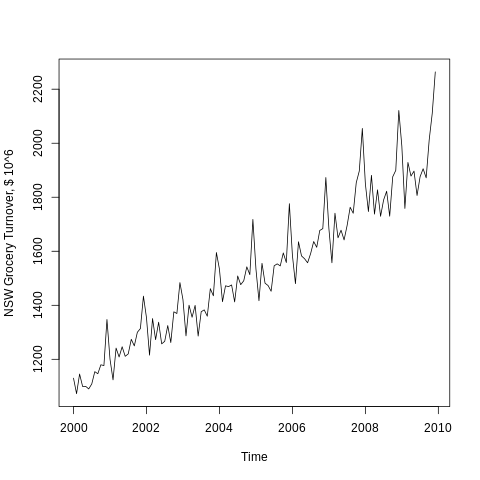

In [22]:
%R plot(grocery, ylab = "NSW Grocery Turnover, $ 10^6")

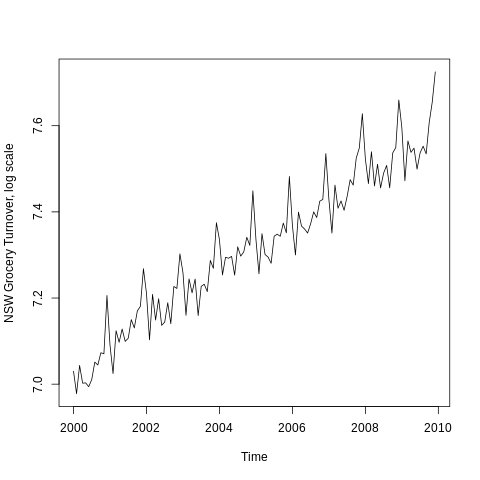

In [25]:
%%R 
# Log to stabilize seasonal variance
logGr <- log(grocery)
plot(logGr, ylab = "NSW Grocery Turnover, log scale")

In [26]:
%%R
outl <- rep(0,length(grocery))
outl[14] <- 900
outl[113] <- -700
tsOutl <- ts(outl, start = c(2000,1), frequency = 12)

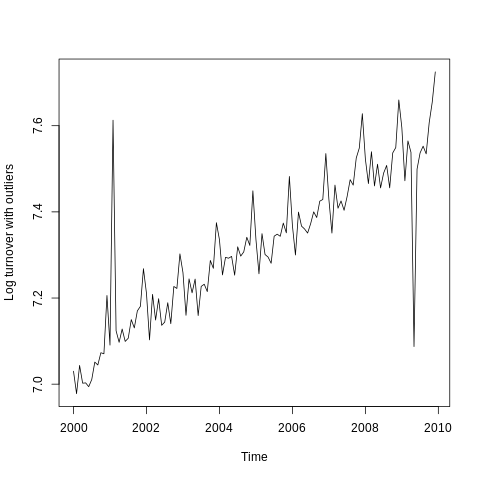

In [27]:
%%R
logGrOutl <- log(grocery + tsOutl)
plot(logGrOutl, ylab = "Log turnover with outliers")